In [ ]:
# Fill in your name using the format below and student ID number
your_name = "van de Water, Robin"
student_id = "1503618"

In [ ]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

     |████████████████████████████████| 163kB 1.8MB/s eta 0:00:01


In [ ]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [ ]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Robin, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [ ]:
base_dir = '/content/drive/My Drive/assignment-3-RobinvdwUU' # For Google Colab
#base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [ ]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [ ]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [ ]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [ ]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

#Keep categorical labeling for using svm
X_train_all_cat, X_test_cat, y_train_all_cat, y_test_cat = train_test_split(Xr,y, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_train_all_cat,y_train_all_cat, stratify=y_train_all_cat, train_size=0.8, random_state=1)


Check the formatting - and what the data looks like

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


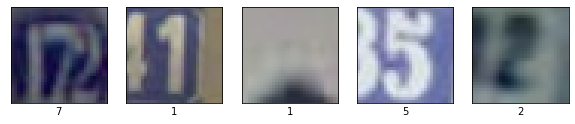

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
print(y_train[1])
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [ ]:
#Some necessary imports

from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 2000)              6146000   
_________________________________________________________________
dense_60 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_61 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_62 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1260      
Total params: 7,304,385
Trainable params: 7,304,385
Non-trainable params: 0
__________

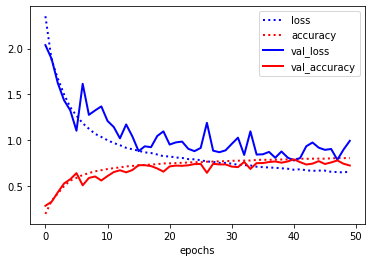

In [16]:

def build_model_1_1():
  base_size = 2000
  inputs = 3072
  model = models.Sequential()

  #Input for data set
  model.add(layers.Reshape((inputs,), input_shape=(32,32,3)))

  #Pyramid shaped dense layers
  model.add(layers.Dense(base_size, activation='relu'))
  model.add(layers.Dense(base_size/4, activation='relu', ))
  model.add(layers.Dense(base_size/8, activation='relu', ))
  model.add(layers.Dense(base_size/16, activation='relu', ))

  #Output
  model.add(layers.Dense(10, activation='softmax'))
  
  #Compile model
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
                train=False, epochs=50, batch_size=128)
answer_q_1_1 ="""First I tried using a small pyramid (128) and reducing this in the way that is shown, the class size seemed small, this resulted in bad performance(acc=0.5).
Then I tried the extreme of 3072 (inspired by the amount of datapoints) accuracy seemed to be much better (acc=0.7). Then tried the middle, with layers of size 2000, this gave the best result (acc=0.8).
Changing the amount of layers or changing the rate of division (with all layersizes considered) seemed to only reduce accuracy.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [ ]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

#Define the preprocessed grayscale trainset
X_train_proc = rgb2gray(X_train)
X_val_proc = rgb2gray(X_val)
X_test_proc = rgb2gray(X_test)

#Define new split
preprocessed_split = X_train_proc, X_val_proc, y_train, y_val

Loading model from file
Success!
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 2000)              2050000   
_________________________________________________________________
dense_105 (Dense)            (None, 500)               1000500   
_________________________________________________________________
dense_106 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_107 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_108 (Dense)            (None, 10)                1260      
Total params: 3,208,385
Trainable params: 3,208,385
Non-trainable params: 0
__________

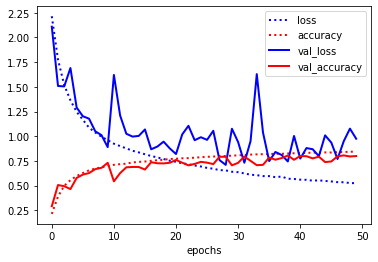

In [18]:
# Build the same model, as instructed, except for input shape
def build_model_1_2():
  base_size = 2000
  inputs = 1024
  model = models.Sequential()
  
  #Input for data set
  model.add(layers.Reshape((inputs,), input_shape=(32,32,1)))

  #Pyramid shaped dense layers
  model.add(layers.Dense(base_size, activation='relu'))
  model.add(layers.Dense(base_size/4, activation='relu', ))
  model.add(layers.Dense(base_size/8, activation='relu', ))
  model.add(layers.Dense(base_size/16, activation='relu', ))

  #Output
  model.add(layers.Dense(10, activation='softmax'))
  
  #Compile model
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=128)
answer_q_1_2 = """ Trying the preprocessed data set gave the original model from Q1.1 some extra accuracy, acc. is consistently around 0.80. It seems that this data set really does not benefit from the extra colour information. 
This makes sense: for processing the shapes of numbers, we don't need color. Finetuning this model could help it improve even more, I would specifically try a smaller base_size and change up the pyramid shape.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_49 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_269 (Dense)            (None, 2000)              2050000   
_________________________________________________________________
dropout_106 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_270 (Dense)            (None, 500)               1000500   
_________________________________________________________________
dropout_107 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_271 (Dense)   

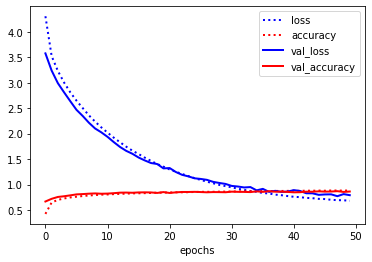

In [19]:
def build_model_1_3():
  model = models.Sequential()

  # Changed this to reflect the dimensions of the preprocessed data set
  inputs = 1024
  base_layer = 2000
  kernel_regularizer = regularizers.l2(0.001)
  model.add(layers.Reshape((inputs,), input_shape=(32,32,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(base_layer, activation='relu', kernel_regularizer=kernel_regularizer))
  model.add(layers.Dropout(rate = 0.3, noise_shape=None, seed=None))
  model.add(layers.Dense(base_layer/4, activation='relu', kernel_regularizer=kernel_regularizer))
  model.add(layers.Dropout(rate = 0.2, noise_shape=None, seed=None))
  model.add(layers.Dense(base_layer/8, activation='relu', kernel_regularizer=kernel_regularizer ))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(base_layer/16, activation='relu', kernel_regularizer=kernel_regularizer))
  model.add(layers.Dropout(rate = 0.1, noise_shape=None, seed=None))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))

  adam = tf.keras.optimizers.Adam()
  sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.7, nesterov=True)
  model.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=128)

answer_q_1_3 = """I added some dropout layers to break up patterns (trying different rates), in the beginning and the end of the network 
this seemed to improve performance by a few percent. I also added the SGD optimizer (because of the sophisticated technique) which seemed 
to get higher accuracy earlier in the process and was better compared to Adam. Adding normalization and a kernel regularizer prevented overfitting 
and increased accuracy further."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_82 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_110 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_83 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_42 (Conv2D)  

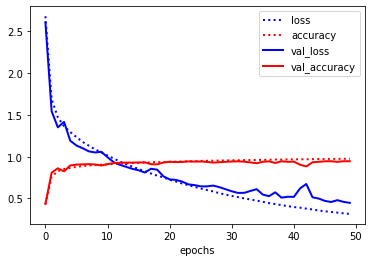

In [20]:
def build_model_2_1():
  kernel_regularizer = regularizers.l2(0.001)

  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=kernel_regularizer))
  model.add(layers.BatchNormalization())
  
  model.add(layers.Dense(10, activation='softmax'))
  sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.7, nesterov=True)
  model.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=256)
# Character limit: 800
answer_q_2_1 = """I began with my network constructed for lab 6. This network worked well, during the assignment, so I tried it on this assignment; 
this proved to also perform well here. I finetined the model by increasing the dropout (decreasing non-existing pattern dependency), adding some additional large dense layers at the end 
(for the  network to adapt some patterns of each class), more batchnormalization (to generalize the data input) and some more maxpooling layers (to prevent overfitting) in between. 
Also, adding the kernel regularizer prevented overfitting even further. Furthermore, I kept the same optimizer and increased the batch size 
to train faster (this made it easier to try various configurations). This resulted in solid performance that could be tweaked by running more epochs. 
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

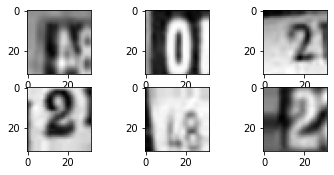

Loading model from file
Success!
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_117 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_130 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_118 (Bat (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_67 (Conv2D)  

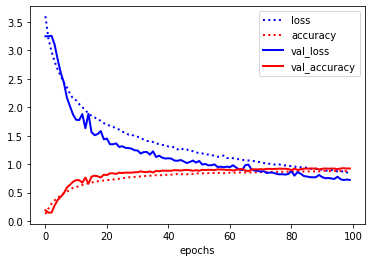

In [21]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Testing code 
# brightness_ranges= [(0.01,-0.01) , (0.05,-0.05), (0.1,0.1)]
# rotation_ranges = [1, 5, 10, 20, 30]
# zoom_ranges = [0.05,0.1, 0.2, 0.3]
# width_shift_ranges = [0.05,0.1,0.2]
# height_shift_ranges = [0.05,0.1,0.2]
# for width in width_shift_ranges:
#   for height in height_shift_ranges:
#for bright in brightness_ranges:
  #for rotation in rotation_ranges:
    #for zoom in zoom_ranges:

bright = (0.0005,-0.0005)
zoom = 0.1
rotation = 5
width = 0.1
height = 0.1
flip = True

#Generate images with the chosen augmentations
IDG = ImageDataGenerator(width_shift_range = width, height_shift_range = height, rotation_range = rotation, zoom_range = zoom, horizontal_flip = flip)

#New data split
augmented_split = IDG.flow(X_train_proc, y_train, batch_size=256), X_val_proc, y_val

for X_batch, y_batch in IDG.flow(X_train_proc, y_train, batch_size=20):
    for i in range(0, 6):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(32,32), cmap='gray')
    # show the plot
    plt.show()
    break
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
              train=False, epochs=100, batch_size=256, generator = True)
answer_q_2_2 = """Looking at the images I tried techniques I felt were good for considering generalizations
I went systematically through different parameters for brightness, zoom, width-shift, height-shift and flips. 
The data augmentation takes much longer to converge to a good model than in previous exercises, which is why I let it run longer. 
After this it is still slowly fitting to the data, concluding that there is negative gain in validation accuracy. We might see an improvement on the test set however"""

print("Brightness: "+str(bright)+", Rotation:"+str(rotation)+", Zoom: "+str(zoom)+ ", Width:" + str(width)+", Height"+ str(height))
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

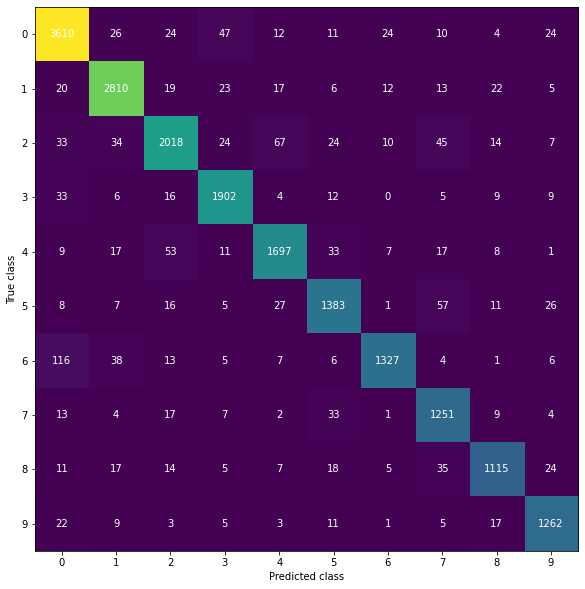

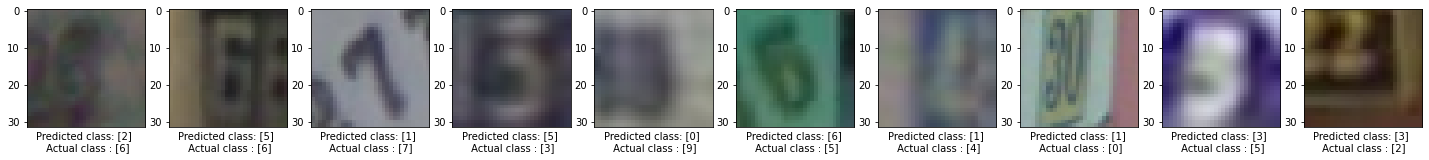

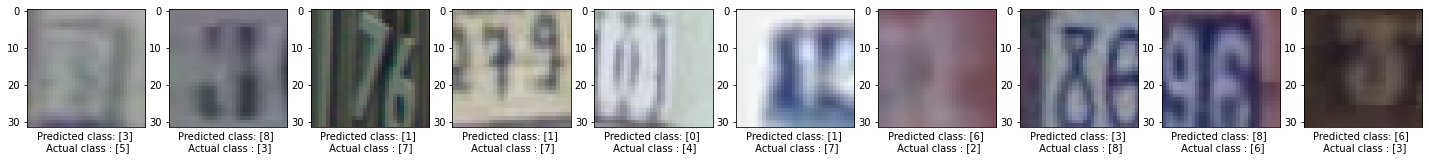

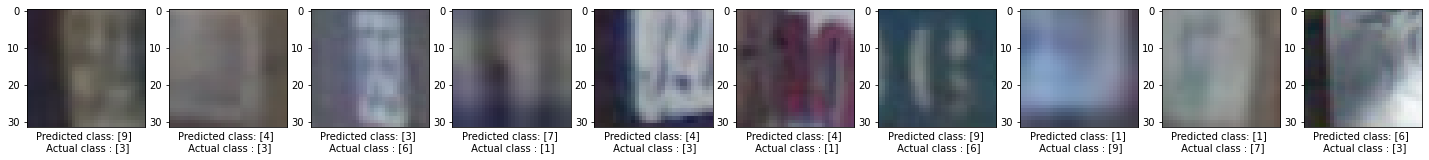

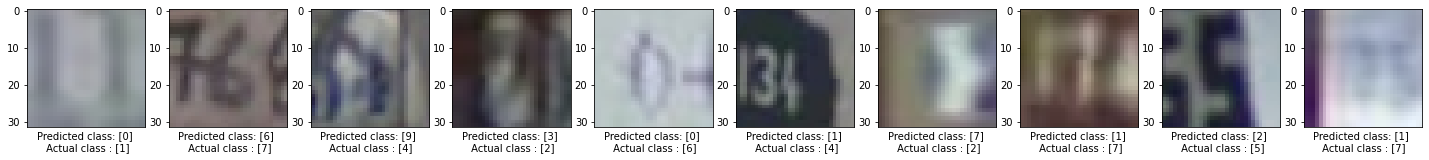

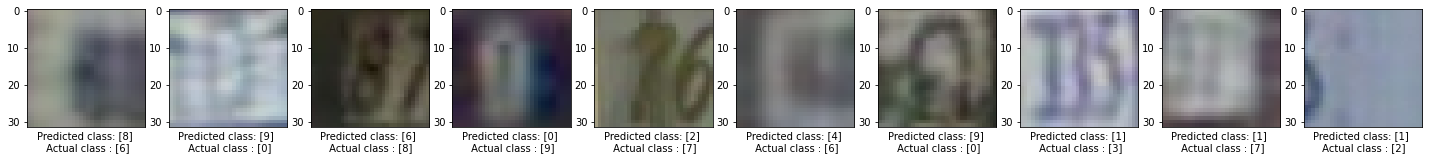

0.9253197703696243
Answer is 709 characters long


In [22]:
test_accuracy_3_1 = 0
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
#Use the model of Q2.1
model = load_model_from_file(base_dir, "model_2_2", extension='.h5')

#Convert test data to grayscale
X_test_proc = rgb2gray(X_test)

#Predict these images
y_predict = model.predict(X_test_proc)

#Results of prediction
predres = np.argmax(y_predict, axis=1)
testres = np.argmax(y_test, axis=1)


def plot_confusion_matrix():
  #Use Built in confusion matrix function
  matrix = confusion_matrix(testres,predres)
  figure, axis = plt.subplots(figsize=(10, 10))
  image = axis.imshow(matrix)
  axis.set_xticks(np.arange(10)), axis.set_yticks(np.arange(10))
  #Plot the class labels on both axes
  axis.set_xticklabels(list(range(10)))
  axis.set_yticklabels(list(range(10)))
  axis.set_ylabel('True class')
  axis.set_xlabel('Predicted class')
  #Plot the 100 tiles
  for i in range(100):
      axis.text(int(i/10),i%10,matrix[i%10,int(i/10)], ha="center", va="center", color="w")


def plot_misclassifications():
  #Get themisclassified samples
  misclassified = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_predict, axis=1))[0]

  #Make figure
  for column in range(5):
    figure, axis = plt.subplots(1, 10,  figsize=(25, 10))
    for numb, i in enumerate(misclassified[column*10:(column+1)*10]):
      axis[numb].imshow(X_test[i])
      axis[numb].set_xlabel("Predicted class: %s \n Actual class : %s" % ([(np.argmax(y_predict[i])+1)%10],[(np.argmax(y_test[i])+1)%10]))
      axis[numb].set_xticks(())
  plt.show();
  
plot_confusion_matrix()
plot_misclassifications()
print(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)))

#Character limit: 800
answer_q_3_1 = """Looking at the matrix, we see that a large amount of errors is being made by predicting 0. Especially 6 is often mispridict. 0 itself also has some mispredictions.
2 is also often mispredicting to other classes. 5 and 7 also seem hard to separate. Overall there doesn't seem to be a major structural error in the model. Looking at the actual images, 
these are often blurry and suffer from low resolution, making it even hard for humans to understand these. The mispredictions are also often due to the unclear backgrounds, too low brightness
and excessove brightness. More agressive and targeted preprocessing could reduce the error of the classifier, although it is not clear if these images can be salvaged"""
print("Answer is {} characters long".format(len(answer_q_3_1)))


### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


Answer is 487 characters long


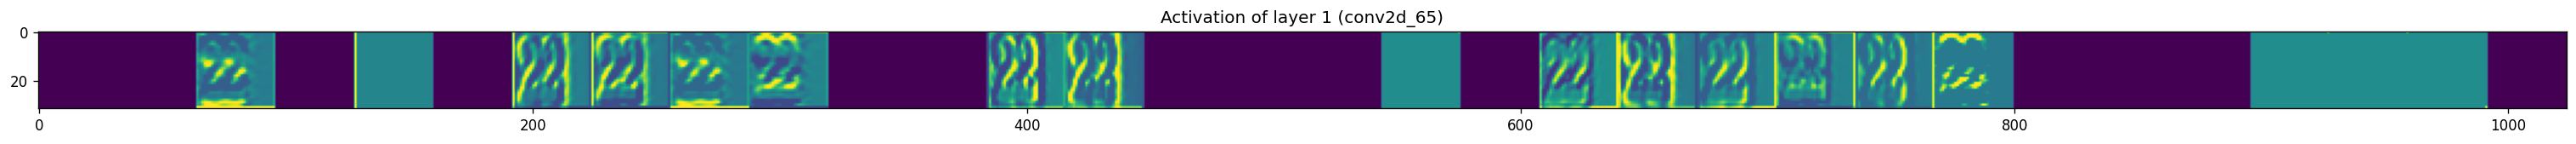

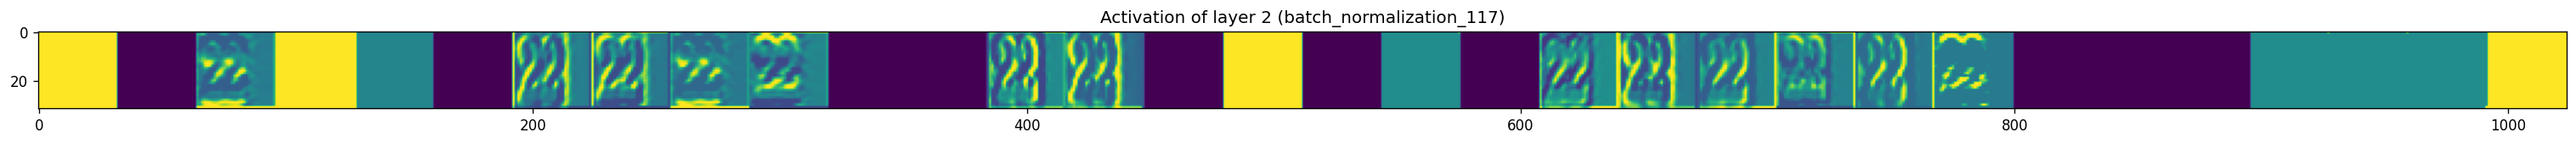

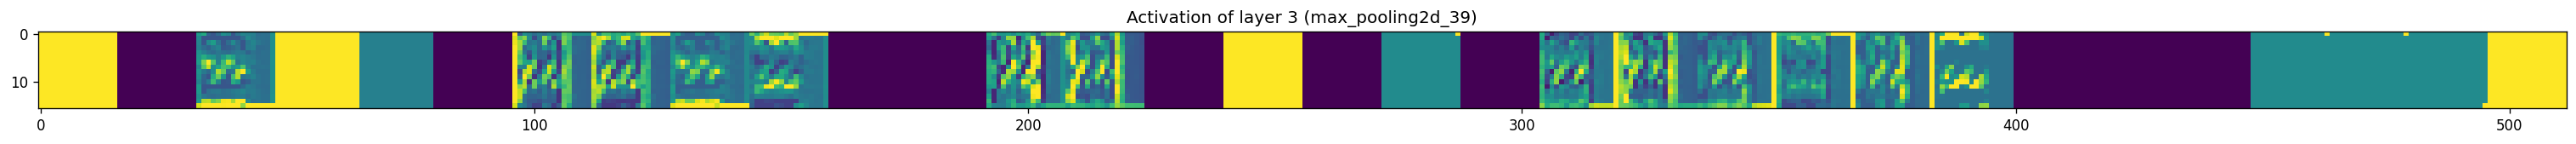

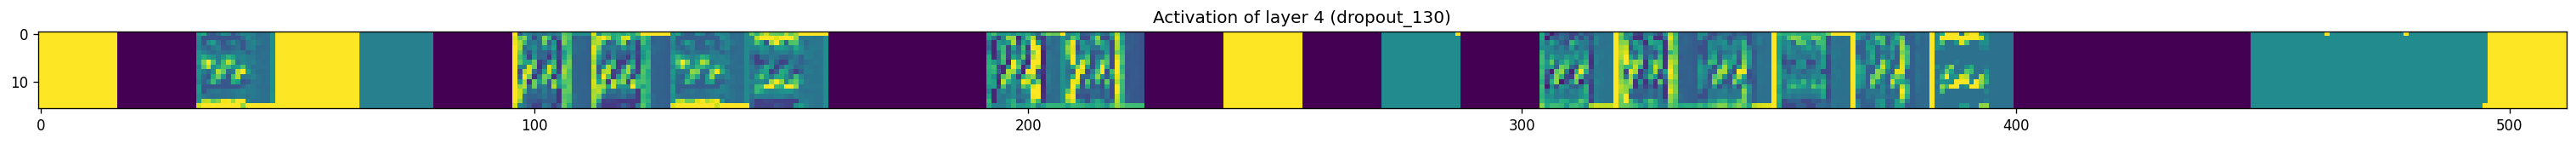

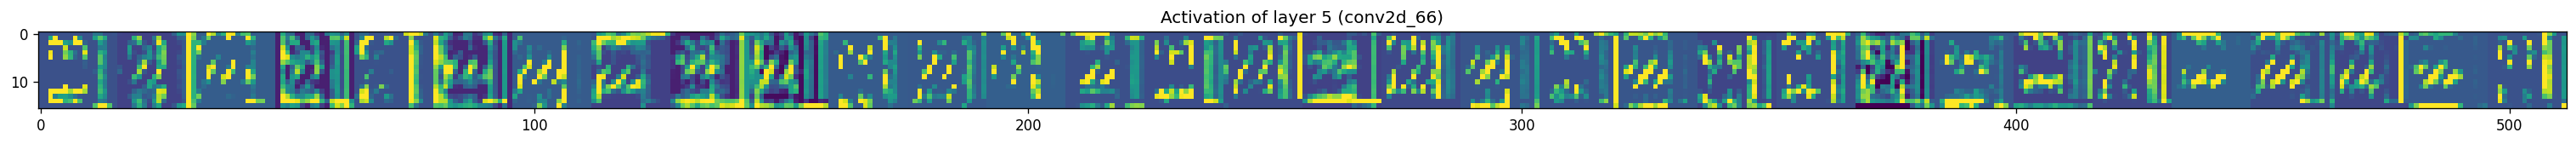

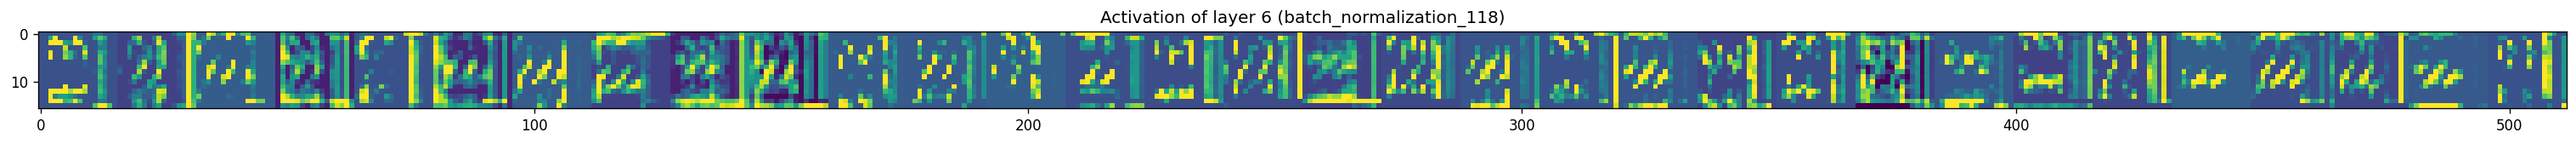

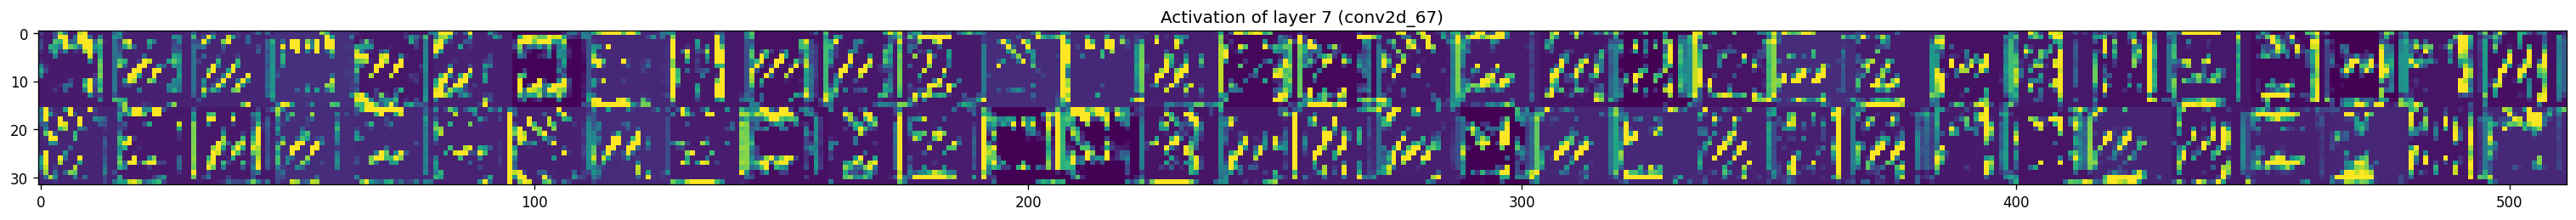

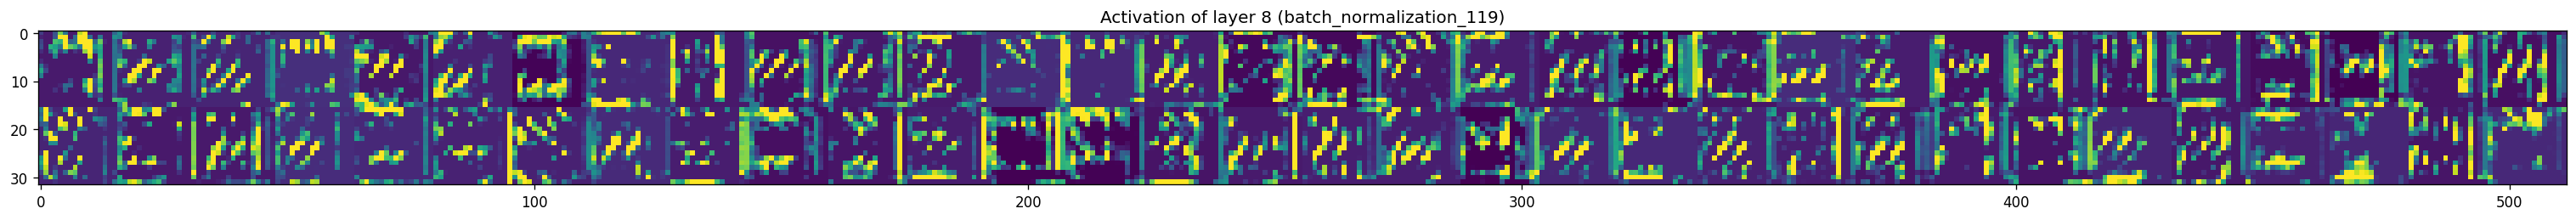

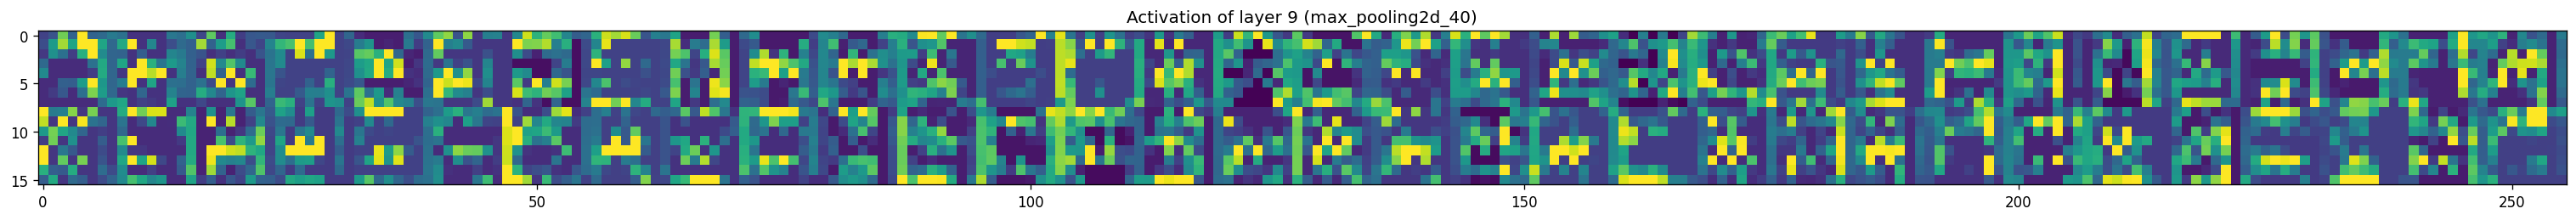

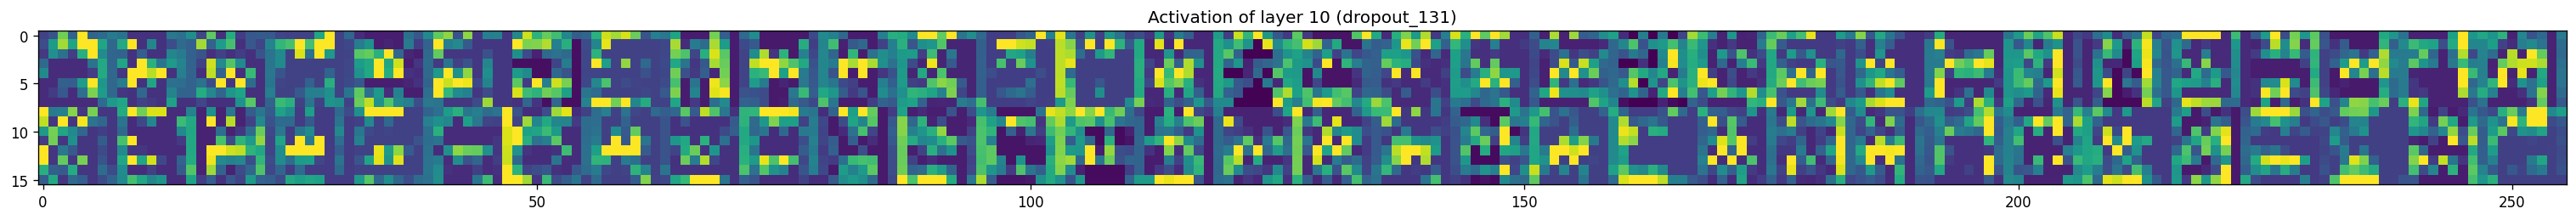

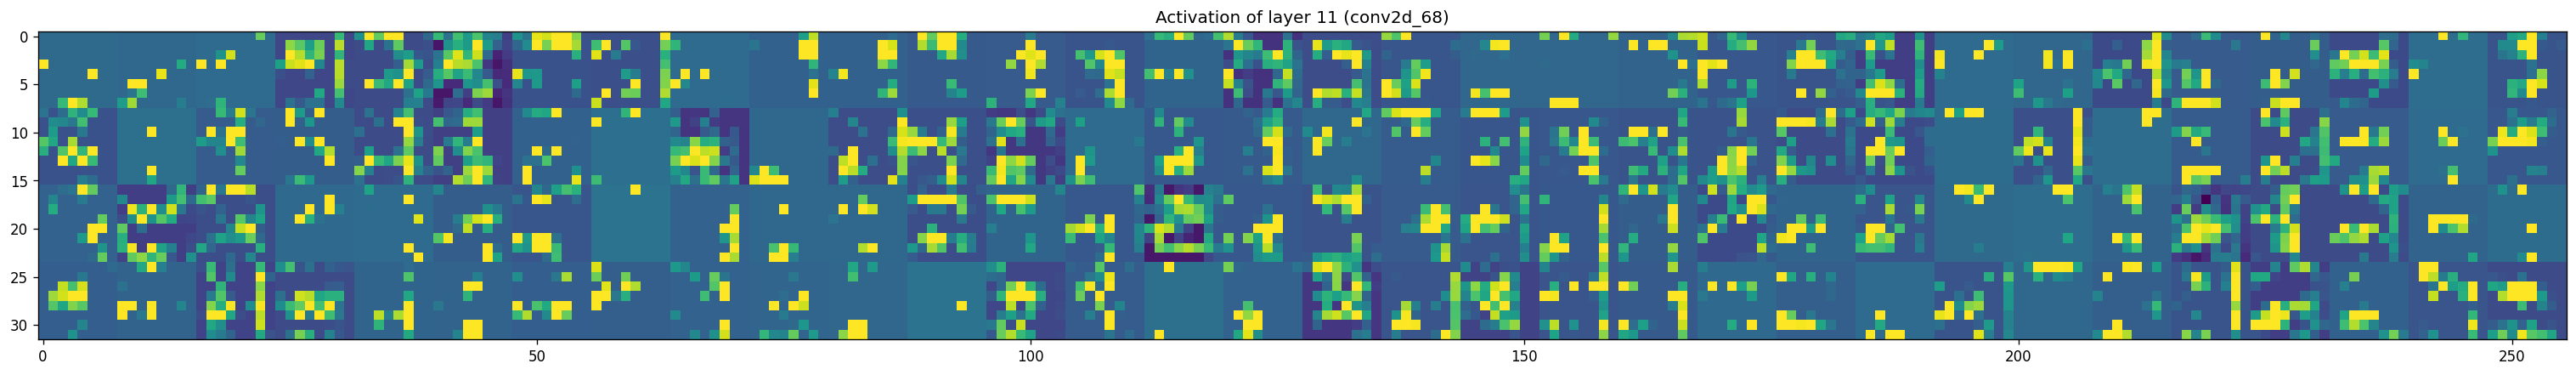

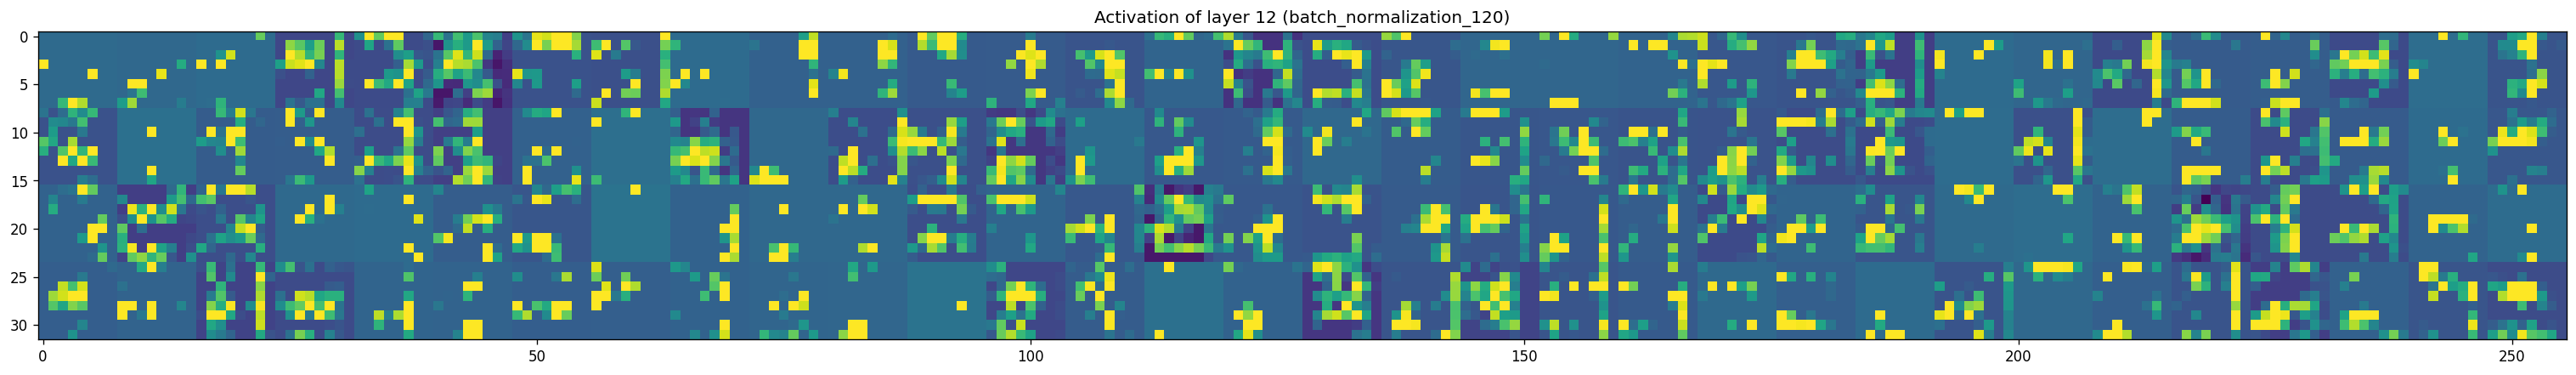

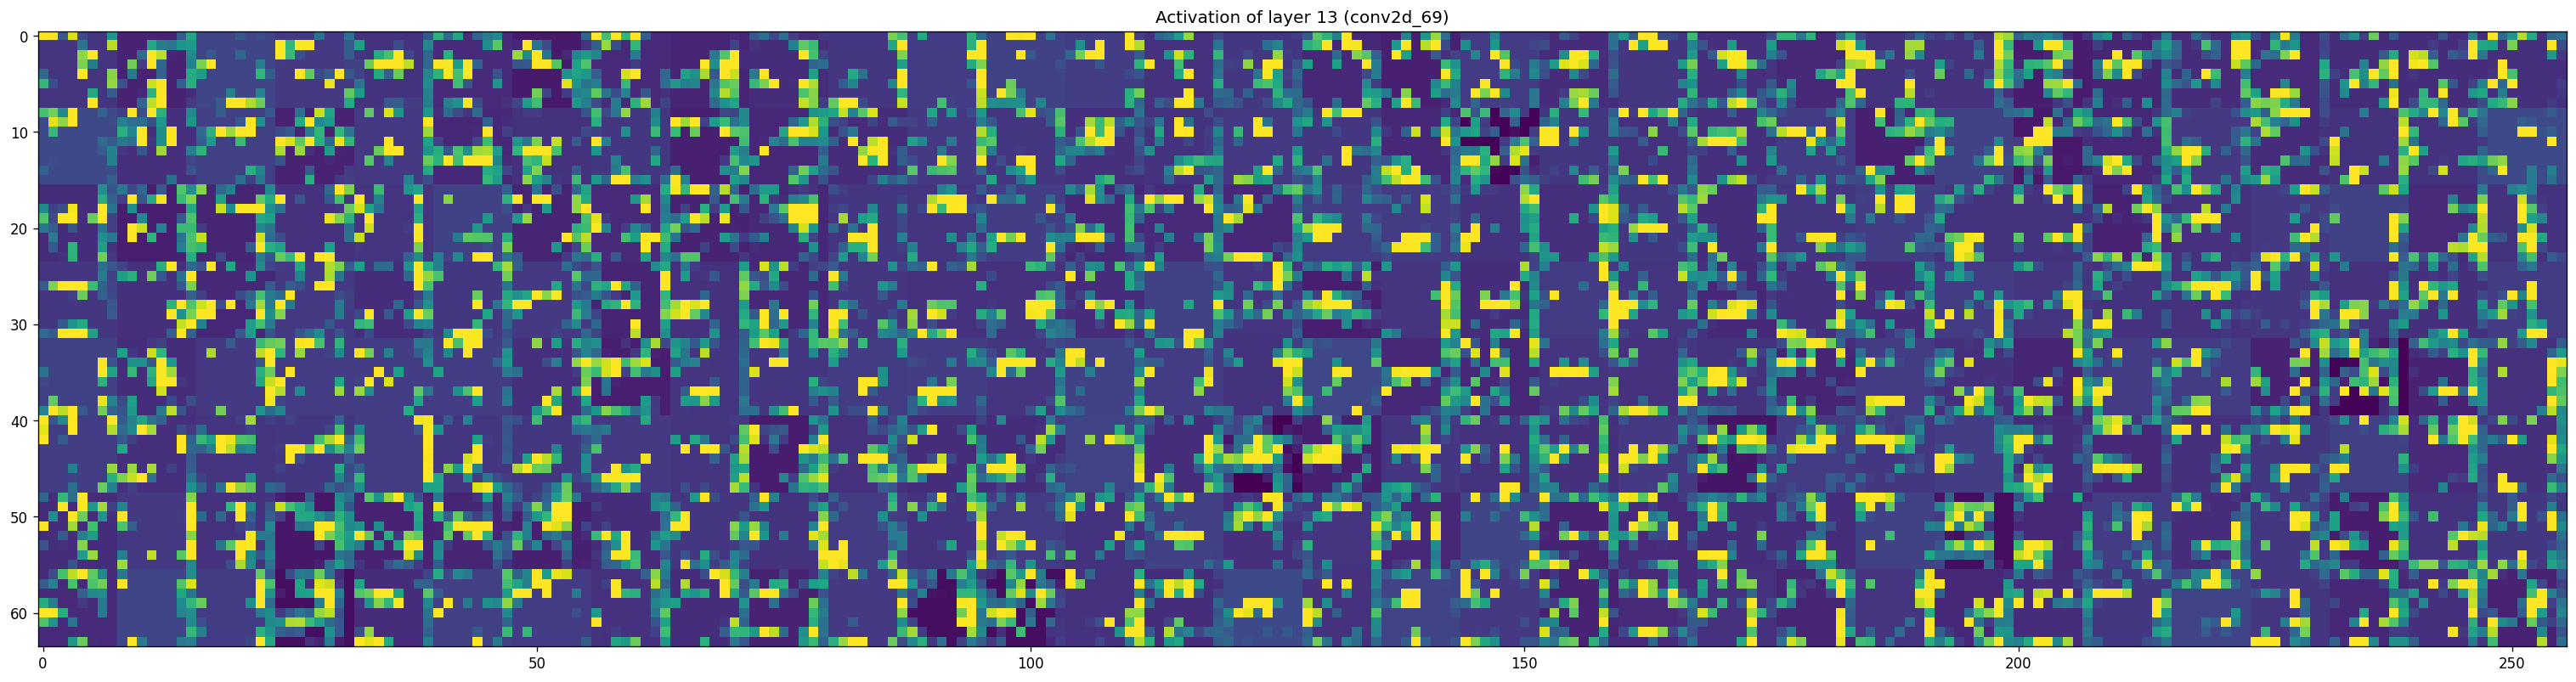

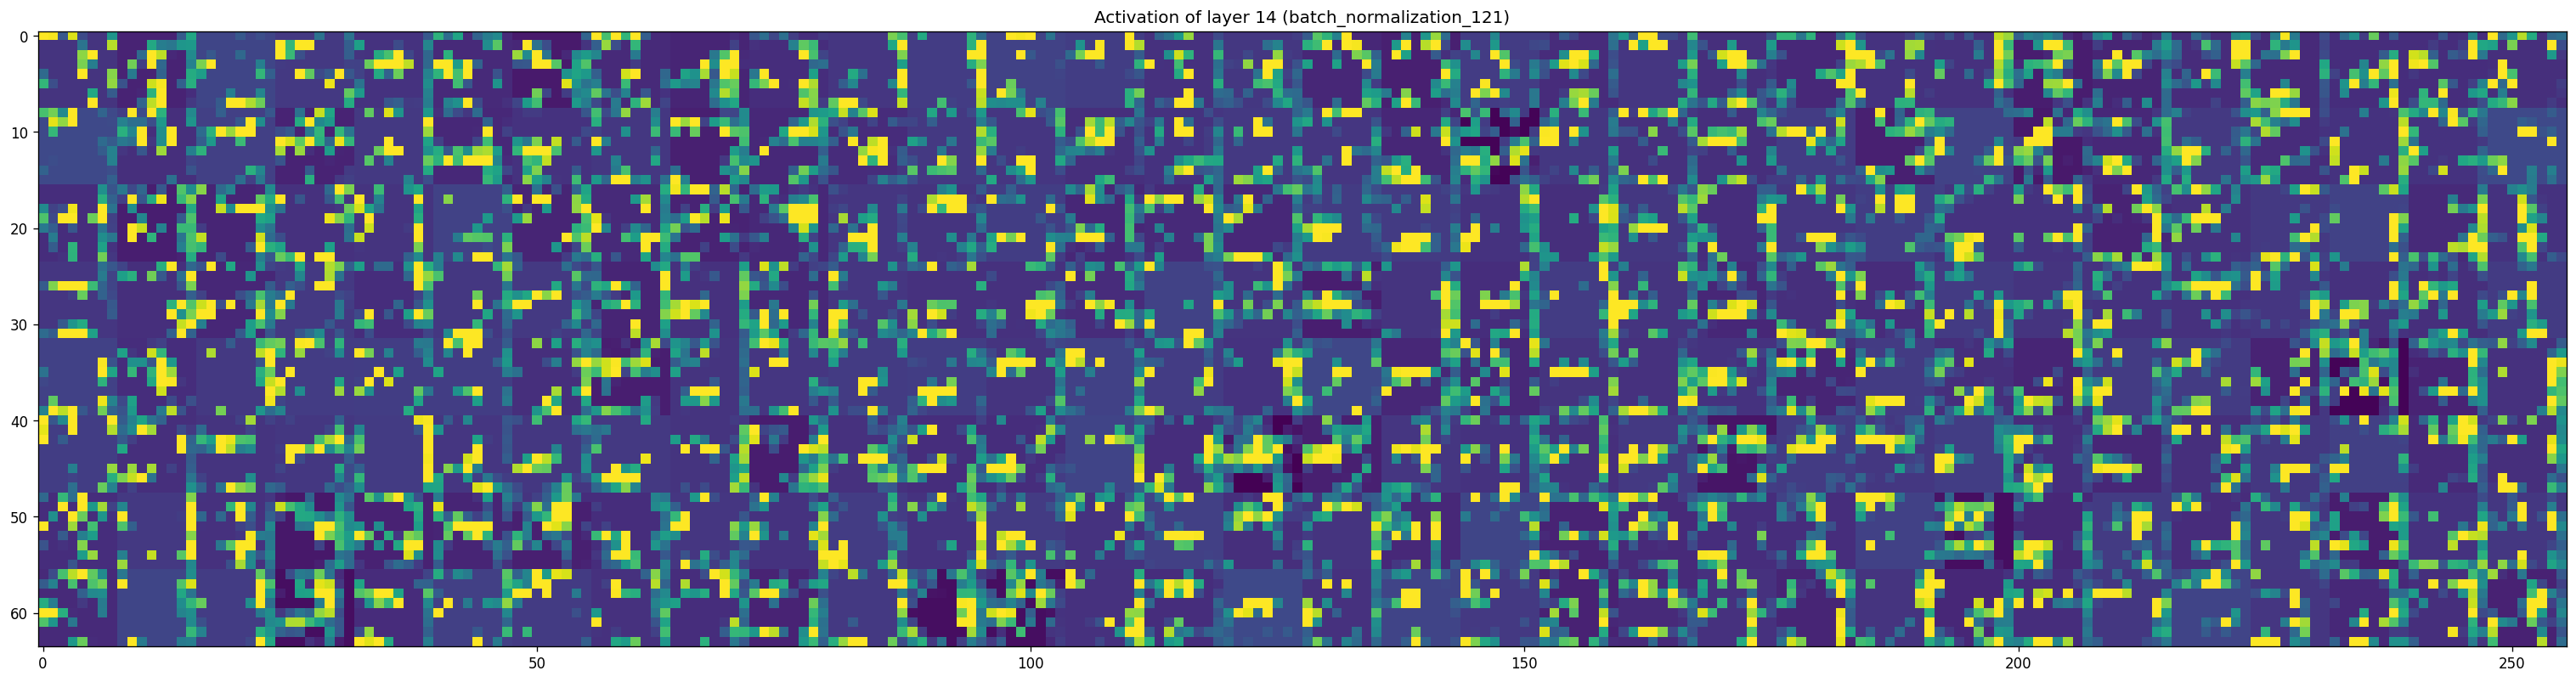

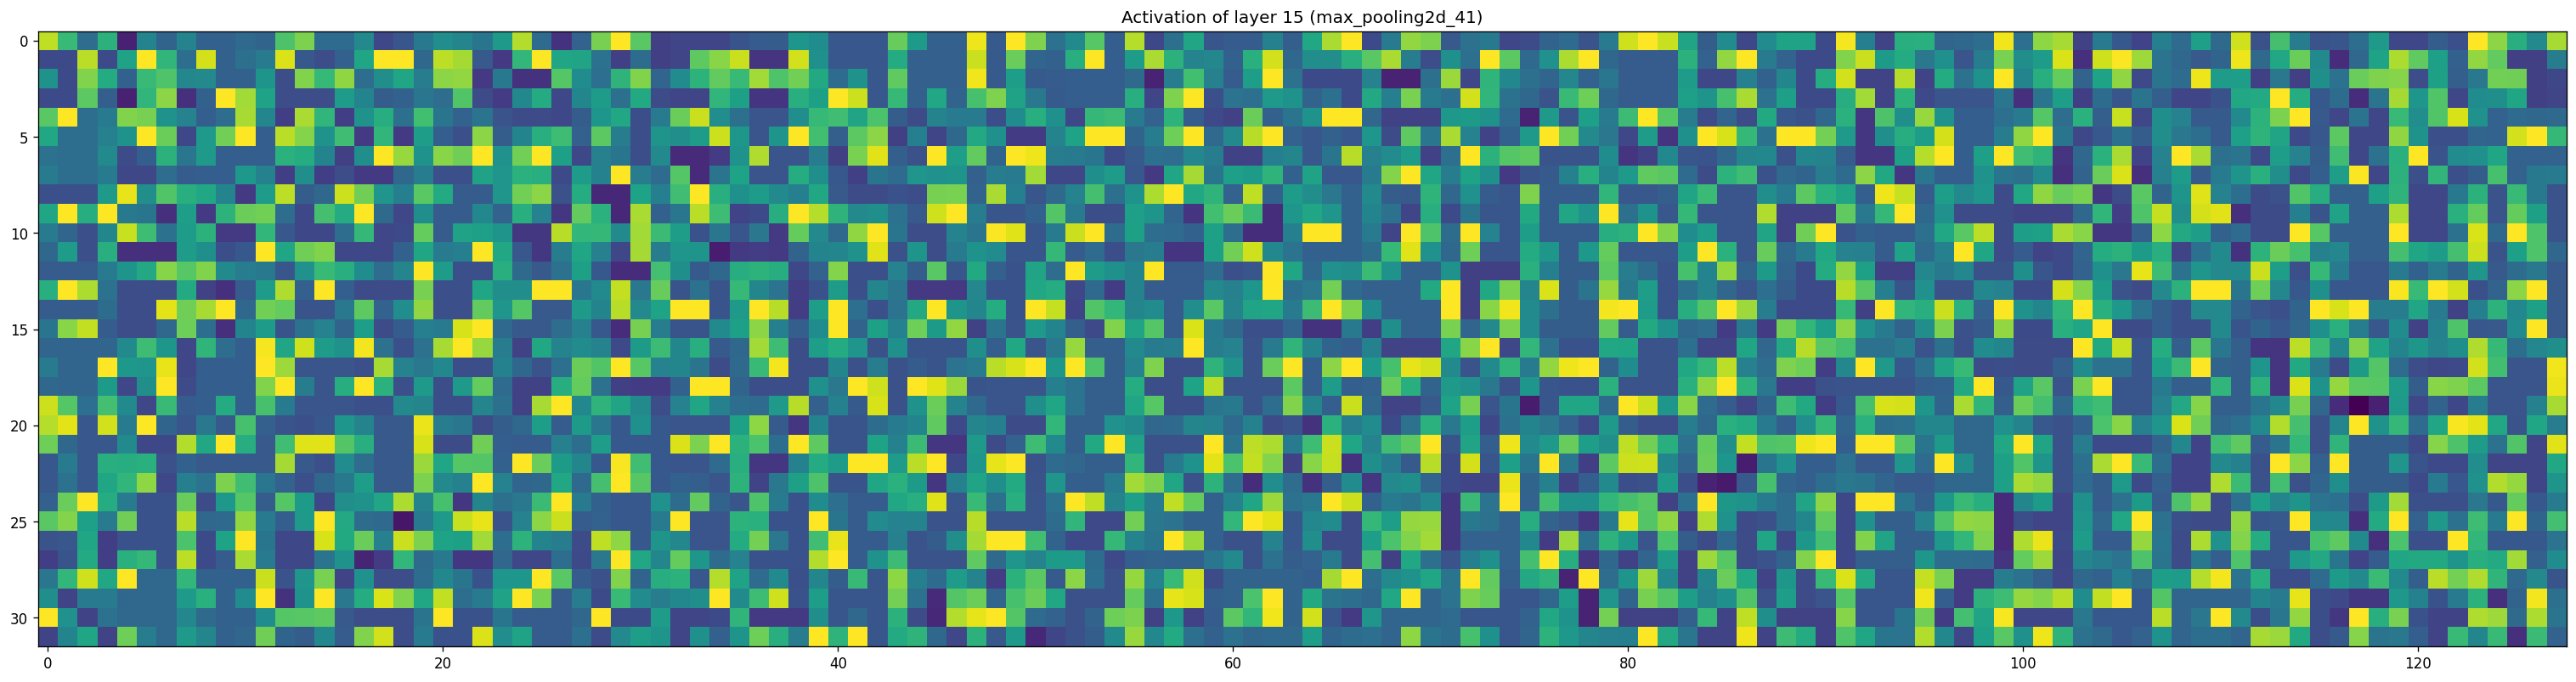

In [23]:
# Contains code adapted from Lab 6: I used this because this is a very similar application.
def plot_activations():
  #Load previous model
  model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
  images_per_row = 32

  #Store layer names
  layer_names = []
  for layer in model.layers[:15]:
    layer_names.append(layer.name)
  
  layer_index = 0
  img_tensor = X_test_proc[1]
  img_tensor = np.expand_dims(img_tensor, axis=0) 

  # Extracts the outputs of the top 8 layers:
  layer_outputs = [layer.output for layer in model.layers[:15]]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  # This will return a list of 5 Numpy arrays:
  # one array per layer activation
  activations = activation_model.predict(img_tensor)
  plt.rcParams['figure.dpi'] = 120
  first_layer_activation = activations[0]

  start = 0
  end = 20
  layer_index = 0
  # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')
      layer_index += 1

plot_activations()

answer_q_3_2 = """I visualized multiple layers up until the last convolutional layer in the network. The model seems to be able to extract the shape of the number correctly.
For layer 5 we can see for example that we get the contours of the image quite well. We can see that some of the images are one solid color (perhaps due to dropout). 
In the later layers (11), we see that the low resolution destroys some patterns. This could indicate that we might need a more delicate method of preserving detail."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_117 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_130 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_118 (Bat (None, 16, 16, 32)        128       
______________________________________

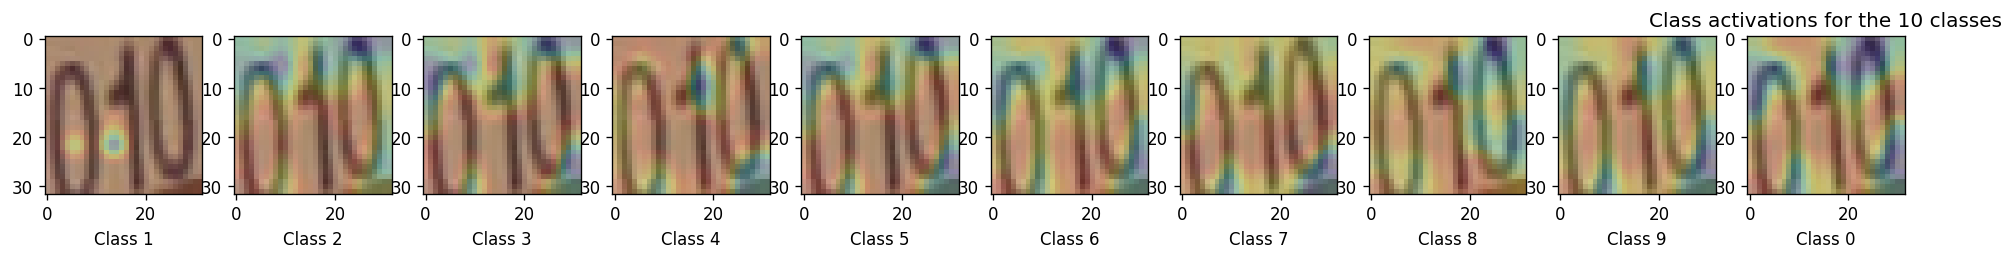

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg16 import preprocess_input
import cv2

def plot_3_3():
  #Image that we want to inspect
  imagenr = 12
  #Convert for overlaying
  imageoverlay = X_test_proc[imagenr]
  imageoverlay_converted = X_test[imagenr].reshape((32,32,3))
  imageoverlay = np.expand_dims(imageoverlay, axis=0) 

  model = load_model_from_file(base_dir, "model_2_2")

  fig, axes = plt.subplots(1, 10,  figsize=(20, 10))
  plt.title("Class activations for the 10 classes")

  #Show what our network looks like
  model.summary()

  #Last convolutional layer in our network
  last_conv_layer = model.get_layer("conv2d_69")

  #Go through activations for all classes
  for classes in range(10): 
    class_output = model.output[:, classes]

    tf.compat.v1.disable_eager_execution()

    grads = K.gradients(class_output, last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([imageoverlay])

    for i in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # We resize the heatmap
    heatmap = cv2.resize(heatmap, (32, 32))

    #Convert to RGB
    heatmap = np.uint8(255*heatmap)

    #Apply heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = heatmap / 255

    #Apply overlay
    result_image = 1 * imageoverlay_converted + 0.2 * heatmap
    axes[classes].imshow(result_image)
    axes[classes].set_xlabel('Class {}'.format((classes+1)%10))
  
  plt.show(block=False)
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

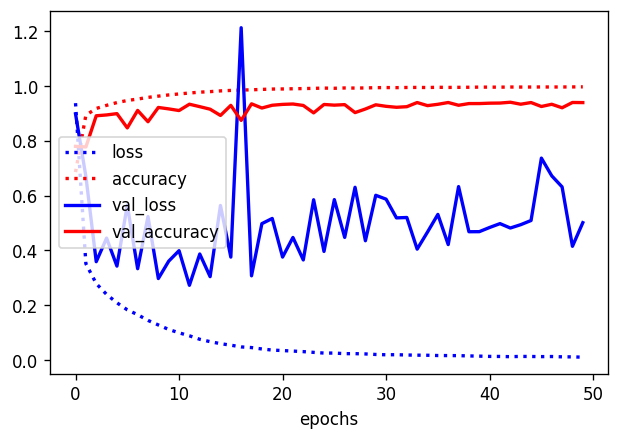

In [26]:
from tensorflow.keras.models import Model

def build_model_4_1():
  vgg16 = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
  model = models.Sequential()
  vgg16.summary()
  
  for layer in vgg16.layers:
    if layer.name == 'block5_conv1' or layer.name=='block4_conv1' or layer.name=='block3_conv1':
        layer.trainable = True
    else:
        layer.trainable = False
  model.add(vgg16)

  model.add(layers.Flatten())
  # Added some simple extra layers to improve results
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=False, epochs=50, batch_size=256)

answer_q_4_1 = """I added some layers that seemed to contribute well in the previous neural networks. I also freezed all layers, 
except for the first layers of block 5,4,3. This seemed to perform well in comparison to freezing. With these adjustments, the performance is very comparable to my best model so far, 
except for some overfitting behaviour. Overall, VGG16 seems to be a good baseline model for image recognition; this indicates that warm starting from this architecture is a good idea."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [27]:
import pickle
import gzip
import sklearn as sk
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  embedding_model = load_model_from_file(base_dir, "model_4_1", extension='.h5')
  embedding_model.summary()
  result_train = embedding_model.predict(x = X_train, batch_size = 256, verbose=1)
  result_test = embedding_model.predict(x = X_test, batch_size = 256, verbose=1)
  result_validate = embedding_model.predict(x = X_val, batch_size = 256, verbose=1)
  print(result_train[1])
  store_embedding(result_train, 'train_results')
  store_embedding(result_test, 'test_results')
  store_embedding(result_validate, 'validate_results')

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  X_train = load_embedding('train_results')
  X_test = load_embedding('test_results')
  X_val = load_embedding('validate_results')
  clf = svm.SVC(verbose=True, max_iter=1000)
  rfc = RandomForestClassifier(max_features = 10, random_state = 1,n_jobs=5, verbose = True)
  log = LogisticRegression(random_state = 1, max_iter = 1500, verbose=True)
  pipeline = Pipeline(steps=[("Scaler",Normalizer()),("Classifier", clf)])

  # pipeline1 = Pipeline(steps=[("Scaler",Normalizer()),("Classifier", clf)])
  # pipeline2 = Pipeline(steps=[("Scaler",Normalizer()),("Classifier", rfc)])
  # pipeline3 = Pipeline(steps=[("Scaler",Normalizer()),("Classifier", log)])
  # fitted1= pipeline1.fit(X=X_train, y=y_train_cat)
  # fitted2= pipeline2.fit(X=X_train, y=y_train_cat)
  # fitted3= pipeline3.fit(X=X_train, y=y_train_cat)
  # print(fitted1.score(X=X_val, y=y_val_cat))
  # print(fitted2.score(X=X_val, y=y_val_cat))
  # print(fitted3.score(X=X_val, y=y_val_cat))
  return pipeline 

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
  evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  fitted = pipeline.fit(X=X_train, y=y_train_cat)
  score = fitted.score(X=X_test, y=y_test_cat)

  return score

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  score = evaluate_pipeline(generate_pipeline(), X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
  return score

print(evaluation_4_2(X_train = load_embedding('train_results'), y_train = y_train, X_test = load_embedding('test_results'), y_test = y_test))  

answer_q_4_2 = """ The SVM model that I tried to train seems to have a quite bad result (0.329) with 1000 max iter. Random forest and logistic regression seem even worse. 
All in all, I think I stored the wrong embeddings for this assignment to do correct predictions. I do not see any other way that it would be feasible to store embeddings, 
however as that would involve enormous amounts of data.  
"""

print("Answer is {} characters long".format(len(answer_q_4_2)))

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.32964044717494206
Answer is 384 characters long
